> **# Primer parcial, Métodos Computacionales**

Código realizado por Claudia Cuellar Nieto & Thomas Andrade Hernández.

**Primer punto:** El operador derivada central de orden superior se puede ver como una combinación lineal de las imágenes del conjunto soporte:

$$\frac{df(x)}{dx} \cong \sum_{i = -n}^{n}{c_{i + n} \cdot f(x + ih)}.$$

donde $n$ representa el número de vecinos del punto de la estimación, por ejemplo, para $n = 2$ se tiene: $X = \{−2h, −h, 0, h, 2h\}$. La primera derivada es entonces:

$$\frac{df(x)}{dx} \cong c_{0} \cdot f(x - 2h) + c_{1} \cdot f(x - h) + c_{2} \cdot f(x) + c_{3} \cdot f(x + h) + c_{4} \cdot f(x + 2h)$$

El procedimiento de interpolación permite calcular el valor de los coeficientes y establecer el orden de aproximación de la derivada $(\mathcal{O}(h^{k}))$. Los coeficientes del operador están dados por las derivadas de las funciones cardinales evaluadas en el punto central $X[2] = 0$:

$$c_{i} = \frac{\mathcal{L}_{i}(x)}{dx}, \quad x = 0$$

Para cinco puntos nodales los coeficientes son:

$$\vec{c} = \left[ +\frac{1}{12h}, - \frac{2}{3h}, 0, +\frac{2}{3h}, -\frac{1}{12} \right]$$

In [83]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

x = sym.Symbol('x',real=True)
h = sym.Symbol('h',real=True)

x_ = [-2*h, -1*h, 0*h, 1*h, 2*h]


def Partial_Polynomia(x, x_, j):
    """ La función genera los polinomios auxiliares que sirven para poder construir el
    polinomio interpolador de Lagrange.
    """
    init_poly = 1
    iterations = len(x_)
    for i in range(iterations):
        if i != j:
            init_poly *= (x - x_[i])/(x_[j] - x_[i])
    return init_poly

Coefficients = []

def GetCoefficients(x,x_, p = 2):
  """ Se obtienen los coeficientes necesarios para realizar correctamente el procedimiento.
  """
  for i in range(len(x_)):
    Lagrange_i = Partial_Polynomia(x,x_,i)
    dLagrange_i = sym.diff(Lagrange_i,x,1)
    coefficient = dLagrange_i.subs(x,x_[p])
    Coefficients.append(coefficient)

GetCoefficients(x,x_)
print("Los coeficientes que buscamos son, pues, {}.".format(Coefficients))

Los coeficientes que buscamos son, pues, [1/(12*h), -2/(3*h), 0, 2/(3*h), -1/(12*h)].


> **Punto teórico de ejercicios de derivación: ¿Cuál es el orden de aproximación $\mathcal{O}(h^{k})$?**

Dado el polinomio interpolador de grado $n$, usando el método de Lagrange, su derivada obtendrá un grado. Usando la definición para la primera derivada central, su orden de aproximación estará dado por la expansión de Taylor. En este caso, de grado dos, por ende, $\mathcal{O}(h^{2})$.

**Segundo punto:** Con relación a la Ley de Snell:

In [80]:
x = np.linspace(-3, 3, 100)
n_0 = 1
n_1 = 1.33

def Light_traveling(x, T = (-3, 2), R = (2, -2), n_0 = 1, n_1 = 1.33):
    z_0 = n_0 * np.sqrt((x - T[0])**2 + T[1]**2)
    z_1 = n_1 * np.sqrt((x - R[0])**2 + R[1]**2)
    return z_0 + z_1


# Hallar el mínimo de la función t(x):

def NewtonRaphson_Method(function, x_n, itmax = 10000, precision = 1e-8):
    """ Empleando el método de iteraciones de Newton sobre la derivada en puntos (x_n, f(x_n))
    se consigue una aproximación aceptable de la raíz de una funciónd dada con base en alguna
    estimación inicial proveída.
    """
    error = 1
    iteration = 0
    while error >= precision and iteration < itmax:
        try:
            x_n1 = x_n - (Central_Derivative(function, x_n))/ (Second_Derivative(function, x_n))
            error = np.abs((Central_Derivative(function, x_n))/ (Second_Derivative(function, x_n)))
        except ZeroDivisionError:
            print("No se puede dividir entre cero.")
        x_n = x_n1
    if iteration == itmax:
        return False
    else:
        return x_n

# Sección general de las derivadas:

def Central_Derivative(function, x, h = 1e-6): # Segundo Orden
    """ Se emplean tanto valores posteriores como anteriores para la búsqueda de la 
    derivada en el punto de interés.
    """     
    expression = function(x + h) - function(x - h)
    return (1)/(2*h) * expression

def Second_Derivative(function, x, h = 1e-6): # Segundo Orden
    """ Y bueno... Es una segunda derivada con valores posteriores y anteriores,
    no mucho más.
    """
    expression = function(x + h) - 2*function(x) + function(x - h)
    return (1)/(h**2) * expression

min_point = NewtonRaphson_Method(Light_traveling, 0)

# Búsqueda de ángulo:

def Searching_Angle(point, point_ = (min_point, 0)):
    angle = np.arctan(np.abs(point[0] - point_[0])/np.abs(point[1] - point_[1]))
    return angle

alpha_0 = np.degrees(Searching_Angle((-3, 2)))
alpha_1 = np.degrees(Searching_Angle((2, -2)))

print("El punto mínimo de la función ct(x) es igual a x = {}.".format(min_point))

print("La luz entra con un ángulo de {}° al agua, siendo modificado posteriormente a {}°.".format(alpha_0, alpha_1))


El punto mínimo de la función ct(x) es igual a x = 0.31690575795806336.
La luz entra con un ángulo de 58.91121594336357° al agua, siendo modificado posteriormente a 40.08219172390684°.


Se puede apreciar que el cociente de los coeficients de refracción n_0 = 1 y n_1 = 1.33, comparado con el cociente de los senos es diferente (0.7518796992481203 != 0.978996414930158), lo que nos dice que la Ley de Snell no se cumple.
Lo más seguro que sucedió es que fue error de cálculos propios.


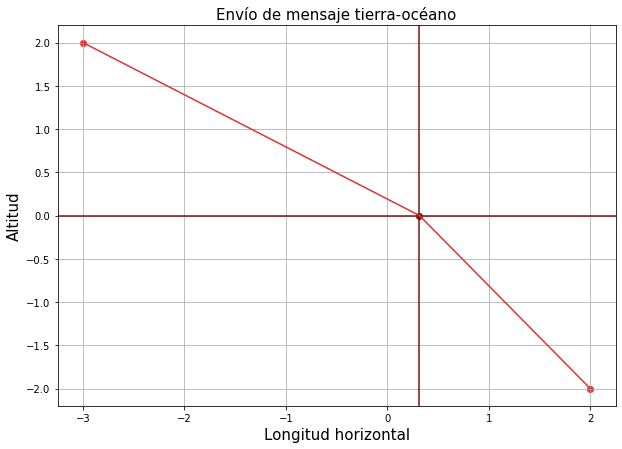

In [82]:
# Información general del ploteo del diagrama:

fig = plt.figure(figsize = (10,7))
plt.title('Envío de mensaje tierra-océano', fontsize = 15)
plt.xlabel(r'Longitud horizontal',fontsize = 15)
plt.ylabel(r'Altitud',fontsize = 15)
plt.axhline(y = 0, color = '#800F0F', linestyle = '-')
plt.axvline(x = min_point, color = '#800F0F', linestyle = '-')
plt.scatter(min_point, 0, color = '#800F0F', marker = 'o')
plt.scatter(-3, 2, color = "#DC3333", marker = 'o')
plt.scatter(2, -2, color = "#DC3333", marker = 'o')
plt.plot([min_point, -3], [0, 2], color = '#DC3333')
plt.plot([min_point, 2], [0, -2], color = '#DC3333')
plt.grid()

# Respusta final:

print("Se puede apreciar que el cociente de los coeficients de refracción n_0 = {} y n_1 = {}, comparado con el cociente de los senos es diferente ({} != {}), lo que nos dice que la Ley de Snell no se cumple.".format(n_0, n_1, n_0/n_1, np.sin(alpha_1)/np.sin(alpha_0)))
print("Lo más seguro que sucedió es que fue error de cálculos propios.")

**Punto teórico de ejercicios de raíces de polinomio:** Muestre que el tiempo de viaje del pulso de luz está dado por:

$$ C\cdot t(x) = n_o\sqrt ((x-T[0])^2 + T[1]^2) + n_1\sqrt((x-R[0])^2 + R[1]^2)$$

*Respuesta:*
Dada la relación del índice de refracción con la velocidad de la luz $n = c/v$ y la definición básica de la velocidad $v = d/t$. Podemos obtener la siguiente ecuación,

$$ c=n\cdot(d/t) \Rightarrow c\cdot t= n\cdot d$$

Donde d estará definida por la distancia euclideana,

$$d = ((x-x_0)^2 + (y-y_0)^2)  $$

Como podemos observar, dicha distancia estará multiplicando por su respectivo coeficiente de refracción y tomando el eje y como el origen.

$$d = \sqrt((x-T[0])^2 + (T[1])^2)  + \sqrt((x-R[0])^2 + (R[1])^2)$$

$$ C\cdot t(x) = n_0\sqrt((x-T[0])^2 + (T[1])^2)  + n_1\sqrt((x-R[0])^2 + (R[1])^2)$$

Así, queda mostrado que el tiempo de viaje del pulso de luz en este caso estará dado por dicha expresión multiplicada por la constante de la velocidad de la luz.

**Punto teórico de ejercicios de derivación:** Cuál es el orden de aproximación $\sigma(h^k)$?

Dado el polinomio interpolador de grado n, usando el método de Lagrange, su derivada obtendrá un grado $n+2$. Usando la definición para la primera derivada central, su orden de aproximación estará dado por la expansión de Taylor. En este caso, de grado dos, por ende $\sigma(h^2)$.

**Punto teórico de ejercicios de derivación:** Muestre que el tiempo de viaje del pulso de luz está dado por:

$$ C\cdot t(x) = n_o\sqrt ((x-T[0])^2 + T[1]^2) + n_1\sqrt((x-R[0])^2 + R[1]^2)$$

**Respuesta:**
Dada la relación del índice de refracción con la velocidad de la luz $n = c/v$ y la definición básica de la velocidad $v = d/t$. Podemos obtener la siguiente ecuación,

$$ c=n\cdot(d/t) \Rightarrow c\cdot t= n\cdot d$$

Donde d estará definida por la distancia euclideana,

$$d = ((x-x_0)^2 + (y-y_0)^2)  $$

Como podemos observar, dicha distancia estará multiplicando por su respectivo coeficiente de refracción y tomando el eje y como el origen.

$$d = \sqrt((x-T[0])^2 + (T[1])^2)  + \sqrt((x-R[0])^2 + (R[1])^2)$$

$$ C\cdot t(x) = n_0\sqrt((x-T[0])^2 + (T[1])^2)  + n_1\sqrt((x-R[0])^2 + (R[1])^2)$$

Así, queda mostrado que el tiempo de viaje del pulso de luz en este caso estará dado por dicha expresión multiplicada por la constante de la velocidad de la luz.
